In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re
from collections import Counter


import konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.utils import pprint

import warnings
warnings.simplefilter("ignore")

from wordcloud import WordCloud
import matplotlib.pyplot as plt


from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# 기초 불용어 처리
from nltk.corpus import stopwords

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 워드 클라우드를 위한 라이브러리
from collections import Counter
# import pytagcloud
from IPython.display import Image

# 저장
import pickle

In [4]:
path_1 = r"C:\Users\NT550009\Desktop\11st\final_df_1.xlsx"
df_1 = pd.read_excel(path_1)

In [5]:
df_1.head()

,Unnamed: 0,0,1,2,3,4,5,6
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365


In [6]:
path_3 = r"C:\Users\NT550009\Desktop\11st\final_df_3.xlsx"
df_3 = pd.read_excel(path_3)

In [7]:
df_3.head()

,Unnamed: 0,0,1,2,3,4,5,6
0,0,soli*****,2023.04.07,4,작년에 산 것과 비교하면 옷이 좀 얇아진거 같긴 해요그래도 헤비웨이트니까 기본 티보...,"Charcoal, Large",비공개,3716602367
1,1,soli*****,2023.04.07,4,작년에는 그린 샀었는데 링컨그린이랑 색상 차이는 별로 없네요그리고 옷이 좀 얇아진 ...,"Lincoln Green, Large",비공개,3716602367
2,2,coco**************,2023.03.03,5,아웅 색도 맘에들고 사이즈고 여유있고 좋네요,"XX-Large, Smoke Blue",비공개,3716602367
3,3,wls0***,2021.10.13,4,다 좋은데 해외사이즈는 어렵네요...가격은 저렴해사 좋은경험했다고 생각합니다.한국에...,0,"Black, 4X-Large Big",3716602367
4,4,soli*****,2022.07.04,4,헤비티셔츠인데 그닥 헤비는 아닌것같아요.대신 사이즈가 엄청 크네요.디자인은 깔끔합니다.,"X-Large, Hunter Green",비공개,3716602367


In [8]:
df_3.tail()

,Unnamed: 0,0,1,2,3,4,5,6
698,698,파란마음,2021.11.23,3,찐짜크네요...팔길이가 유난희크네...,0,0,3596863528
699,699,loze**,2021.11.22,5,가격대비좋아요,0,0,3596863528
700,700,dnfl********,2021.11.19,4,만족합니다,0,0,3596863528
701,701,dnfl********,2021.11.19,4,한국사이즈100미디엄딱맞네요,0,0,3596863528
702,702,gudd*****,2021.11.15,3,목이 잘 늘어나네요.품질은 목 제외하고 좋습니다.,0,0,3596863528


In [9]:
# df_1과 df_3의 컬럼이 같다고 가정
# df_1과 df_3는 데이터프레임 객체
df = pd.concat([df_1, df_3])

In [10]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365


In [11]:
len(df)

7167

In [12]:
# 컬럼명 바꾸기
def rename_columns(df):
    df = df.rename(columns={0:'ID' , 1:'Date', 2:'Grade', 3:'Text', 4:'Option' , 5:'Size', 6:'ProductNum'})
    return df


In [13]:
df = rename_columns(df)

In [14]:
df.head()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365


<Axes: title={'center': 'ratings'}>

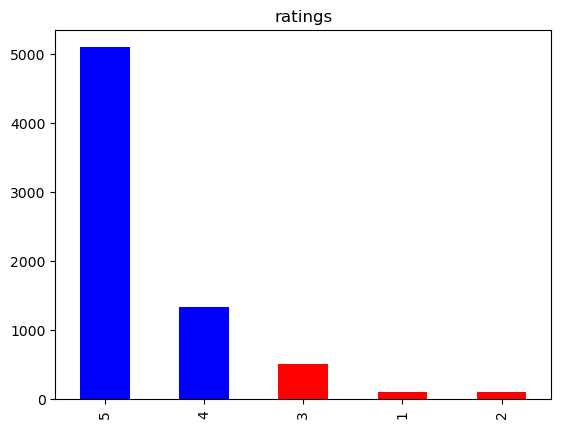

In [15]:
df["Grade"].value_counts().plot(kind="bar",
                              title = 'ratings',
                              color = ['b','b','r','r','r']
                                )

In [16]:
df["Grade"].mean()

4.5635551834798385

In [17]:
# 불용어 처리하기
# 정규화

In [18]:
sample_text = df.iloc[0,4]
print(sample_text)
print(type(sample_text))

쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.
<class 'str'>


In [19]:
okt = Okt()
kkma = Kkma()

In [20]:
print('OKT 형태소 분석 :',okt.morphs(sample_text))

OKT 형태소 분석 : ['쿠폰', '써서', '2만원', '정도에', '6', '벌이', '면', '정말', '싸요', '.', '싼만큼', '마감', '이', '안좋은', '부분', '도', '있네요', '.', '어깨', '선', '재봉', '선', '이', '씹힌것도', '있어요', '.', '보통', '100', '입는데', 'M', '잘', '맞네요', '.']


In [21]:
print('OKT 품사 태깅 :',okt.pos(sample_text))


OKT 품사 태깅 : [('쿠폰', 'Noun'), ('써서', 'Verb'), ('2만원', 'Number'), ('정도에', 'Foreign'), ('6', 'Number'), ('벌이', 'Noun'), ('면', 'Josa'), ('정말', 'Noun'), ('싸요', 'Verb'), ('.', 'Punctuation'), ('싼만큼', 'Verb'), ('마감', 'Noun'), ('이', 'Josa'), ('안좋은', 'Adjective'), ('부분', 'Noun'), ('도', 'Josa'), ('있네요', 'Adjective'), ('.', 'Punctuation'), ('어깨', 'Noun'), ('선', 'Noun'), ('재봉', 'Noun'), ('선', 'Noun'), ('이', 'Josa'), ('씹힌것도', 'Verb'), ('있어요', 'Adjective'), ('.', 'Punctuation'), ('보통', 'Noun'), ('100', 'Number'), ('입는데', 'Verb'), ('M', 'Alpha'), ('잘', 'Verb'), ('맞네요', 'Verb'), ('.', 'Punctuation')]


In [22]:
# 형태소 명사 추출 okt.nouns(text)

print('OKT 명사 추출 :',okt.nouns(sample_text)) 

OKT 명사 추출 : ['쿠폰', '벌이', '정말', '마감', '부분', '어깨', '선', '재봉', '선', '보통']


In [24]:
# 동사 추출 extract_verbs(text)
def extract_verbs(text):
    pos = okt.pos(text)
    verbs = [word for word, tag in pos if tag in ['Verb']]
    return verbs
extract_verbs(sample_text)

['써서', '싸요', '싼만큼', '씹힌것도', '입는데', '잘', '맞네요']

In [25]:
# 형용사 추출 extract_adj(text)

def extract_adj(text):
    pos = okt.pos(text)
    adjs = [word for word, tag in pos if tag in ['Adjective']]
    return adjs
extract_adj(sample_text)

['안좋은', '있네요', '있어요']

In [26]:
#  1) 공백 제거
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', sample_text))

쿠폰써서 2만원정도에 6벌이면. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요 100입는데 맞네요.


In [27]:
# 2) 정규화

remove_blank = re.compile(r'\W*\b\w\b')
remove_mark = remove_blank.sub('', sample_text).replace('.', '')

remove_mark

print(remove_mark)

쿠폰써서 2만원정도에 6벌이면 정말 싸요 싼만큼 마감이 안좋은 부분도 있네요 어깨선 재봉선이 씹힌것도 있어요 보통 100입는데 맞네요


In [28]:
def apply_regular_expression(Text):
    kor = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = kor.sub("",Text) # 위에 설정한 kor 규칙을 text에 적용시킴 
    return result

In [29]:
regular = apply_regular_expression(remove_mark)

In [30]:
path = r"C:\Users\NT550009\Desktop\11st\kor_stopwords.xlsx"
df_stopwords = pd.read_excel(path)

In [31]:
df_stopwords

,0
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
680,ㄷㄱㅌ
681,ㄷㅈㄱㅊ
682,ㅎ
683,ㅎㅎ


In [32]:
stopwords_list = df_stopwords[0].tolist()

In [33]:
stopwords_list

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

In [ ]:
print(stopwords_list)

In [35]:
stop = " "
stop_list = stop.split(',')
tok = okt.morphs(regular)


In [37]:
print(tok)

['쿠폰', '써서', '만', '원', '정도', '에', '벌이', '면', '정말', '싸요', '싼만큼', '마감', '이', '안좋은', '부분', '도', '있네요', '어깨', '선', '재봉', '선', '이', '씹힌것도', '있어요', '보통', '입는데', '맞네요']


In [38]:
# 3) 조사 제거
tok_str = ' '.join(tok)
print(type(tok_str))
print(tok_str)

shortword = re.compile(r'\W*\b\w{1}\b')
third_processed = shortword.sub('', tok_str)

<class 'str'>
쿠폰 써서 만 원 정도 에 벌이 면 정말 싸요 싼만큼 마감 이 안좋은 부분 도 있네요 어깨 선 재봉 선 이 씹힌것도 있어요 보통 입는데 맞네요


In [39]:
print(third_processed)

쿠폰 써서 정도 벌이 정말 싸요 싼만큼 마감 안좋은 부분 있네요 어깨 재봉 씹힌것도 있어요 보통 입는데 맞네요


In [40]:
okt.morphs(third_processed)



['쿠폰',
 '써서',
 '정도',
 '벌이',
 '정말',
 '싸요',
 '싼만큼',
 '마감',
 '안좋은',
 '부분',
 '있네요',
 '어깨',
 '재봉',
 '씹힌것도',
 '있어요',
 '보통',
 '입는데',
 '맞네요']

In [41]:
third_processed = okt.morphs(third_processed)
print(third_processed)

['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마감', '안좋은', '부분', '있네요', '어깨', '재봉', '씹힌것도', '있어요', '보통', '입는데', '맞네요']


In [42]:
# 4) stopwords 불용어 제거
stopwords_list

result = []

for w in third_processed:
    if w not in stopwords_list:
        result.append(w)
print(result)

['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마감', '안좋은', '부분', '있네요', '어깨', '재봉', '씹힌것도', '있어요', '보통', '입는데', '맞네요']


In [43]:
df["FilteredText"] = 0
df.head()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum,FilteredText
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365,0
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365,0
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365,0
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365,0
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365,0


In [44]:
df["FilteredText"] = df["FilteredText"].astype('str')

In [45]:
df['FilteredText'] = df['Text']

In [ ]:
df.to_excel("Filtered.xlsx")

In [46]:
df.head()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum,FilteredText
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...


In [47]:
# sample_text = df.iloc[0,4]
# print(sample_text)
# print(type(sample_text)) str


path = r"C:\Users\NT550009\Desktop\11st\kor_stopwords.xlsx"
df_stopwords = pd.read_excel(path)

stopwords_list = df_stopwords[0].tolist()
stop_list = stop.split(',')

def apply_regular_expression(Text):
    kor = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = kor.sub("",Text) # 위에 설정한 kor 규칙을 text에 적용시킴 
    return result


def apply_stopwords(sample_text):
    #  1) 공백 제거
    remove_blank = re.compile(r'\W*\b\w\b')
    remove_mark = remove_blank.sub('', sample_text).replace('.', '')
    # print(remove_mark)

    # 2) 정규화
    regular = apply_regular_expression(remove_mark)
    # print(regular)
    
    # 3) 불용어 처리 및 조사 제거
    tok = okt.morphs(regular)
    tok_str = ' '.join(tok)
    # print(tok_str)

    shortword = re.compile(r'\W*\b\w{1}\b')
    third_processed = shortword.sub('', tok_str)
    third_processed = okt.morphs(third_processed)
    # print(third_processed)

    result = []
    for w in third_processed:
        if w not in stopwords_list:
            result.append(w)
    return result


In [48]:
sample_text

'쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.'

In [49]:
print(type(sample_text))

<class 'str'>


In [50]:
apply_stopwords(sample_text)

['쿠폰',
 '써서',
 '정도',
 '벌이',
 '정말',
 '싸요',
 '싼만큼',
 '마감',
 '안좋은',
 '부분',
 '있네요',
 '어깨',
 '재봉',
 '씹힌것도',
 '있어요',
 '보통',
 '입는데',
 '맞네요']

In [ ]:
df.info()

In [51]:
def filteredtext(df):
    
        text = df.iloc[i,8]
        filtered_text = apply_stopwords(text)
        df.iloc[i,8] = filtered_text
    





In [52]:
print(df.iloc[0,8])
print(type(df.iloc[0,8]))

쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.
<class 'str'>


In [53]:
for i in range(len(df)):
    text = df.iloc[i,8]
    print(text)
    print(type(text))
    filtered_text = (text)
    print(filtered_text)
    print(type(filtered_text))
    

쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.
<class 'str'>
쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.
<class 'str'>
옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을 것 같아요.
<class 'str'>
옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을 것 같아요.
<class 'str'>
잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매했습니다.잘 받았어요.감사합니다.수고하셨습니다.
<class 'str'>
잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매했습니다.잘 받았어요.감사합니다.수고하셨습니다.
<class 'str'>
얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯
<class 'str'>
얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯
<class 'str'>
저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 타이트합니다우주패스 좋긴하네요
<class 'str'>
저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 타이트합니다우주패스 좋긴하네요
<class 'str'>
105입는데 첨엔 큰가했는데 건조기 돌렸더니 많이 줄어들어서 적당합니다.
<class 'str'>
105입는데 첨엔 큰가했는데 건조기 돌렸더니 많이 줄어들어서 적당합니다.
<class 'str'>
순면 티셔츠 네 장이 한 팩으로 된 구성이고, 이 부문에서 널리 알려진 Hanes 의 제품답게 품질이 좋고 발색이 예쁩니다. 부담없이 일상생활용 혹은 가까운 곳 외출용으로 편안하게 입기 좋습니다.
<class 'str'>
순면 티셔츠

싸고 좋아요. 여름에 뜯을게요. 어차피 쓸 예정
<class 'str'>
싸고 좋아요. 여름에 뜯을게요. 어차피 쓸 예정
<class 'str'>
편하게 입고 다니기에 아주 좋아요!
<class 'str'>
편하게 입고 다니기에 아주 좋아요!
<class 'str'>
얇고 감촉도 뻣뻣하지않고 좋아요
<class 'str'>
얇고 감촉도 뻣뻣하지않고 좋아요
<class 'str'>
재고 문제인 것 같은데, 배송준비중으로 잡혀 취소도 안 되구 해서 기다리다 보니 거의 2달만에 배송되어 왔네요..^^; 가격이 얼마 안해서 그려려니 하고 넘어갑니다. 디자인과 색상은 사진과 동일하게 나왔구요.. 재질은 부드러운 것이 입기 편한 것 같아요~ 전형적 집근처에서 나갈때 입을 편한 티셔츠인 것 같네요..ㅎ
<class 'str'>
재고 문제인 것 같은데, 배송준비중으로 잡혀 취소도 안 되구 해서 기다리다 보니 거의 2달만에 배송되어 왔네요..^^; 가격이 얼마 안해서 그려려니 하고 넘어갑니다. 디자인과 색상은 사진과 동일하게 나왔구요.. 재질은 부드러운 것이 입기 편한 것 같아요~ 전형적 집근처에서 나갈때 입을 편한 티셔츠인 것 같네요..ㅎ
<class 'str'>
사이즈가 아주 커요!주문하실분은 참고하세요.전 3XL 주문신체 스팩으로키 185cm 가슴둘레 130cm 이상임 135정도몸무게 127kg허리사이즈 38인치 아주 헐렁합니다!
<class 'str'>
사이즈가 아주 커요!주문하실분은 참고하세요.전 3XL 주문신체 스팩으로키 185cm 가슴둘레 130cm 이상임 135정도몸무게 127kg허리사이즈 38인치 아주 헐렁합니다!
<class 'str'>
사이즈가 아주 커요!주문하실분은 참고하세요.전 3XL 주문신체 스팩으로키 185cm 가슴둘레 130cm 이상임 135정도몸무게 127kg허리사이즈 38인치 아주 헐렁합니다!
<class 'str'>
사이즈가 아주 커요!주문하실분은 참고하세요.전 3XL 주문신체 스팩으로키 185cm 가슴둘레 130cm 이상임 135정도몸무게 

잘입었어요 출근하면서 입고다니거있어요
<class 'str'>
잘입었어요 출근하면서 입고다니거있어요
<class 'str'>
편한데 사리즈가 오지게커요 ㅋㅋㅋ 그고 실밥 가떨어짐
<class 'str'>
편한데 사리즈가 오지게커요 ㅋㅋㅋ 그고 실밥 가떨어짐
<class 'str'>
ㅓㄹ탕ㅅ엣？치초치ㅗ체ㅗㄹ
<class 'str'>
ㅓㄹ탕ㅅ엣？치초치ㅗ체ㅗㄹ
<class 'str'>
조아요 저렴하게 잘 입고 있어요
<class 'str'>
조아요 저렴하게 잘 입고 있어요
<class 'str'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
0
<class 'int'>
흰와이셔츠 위에입었는데 검은보풀이 붇어나와서 테이프로떼어나느라. 개고생함.메디인차이나  노굳
<class 'str'>
흰와이셔츠 위에입었는데 검은보풀이 붇어나와서 테이프로떼어나느라. 개고생함.메디인차이나  노굳
<class 'str'>
요즘같은 간절기에 입기 좋습니다 그리고 예쁩니다
<class 'str'>
요즘같은 간절기에 입기 좋습니다 그리고 예쁩니다
<class 'str'>
0
<class 'int'>
0
<class 'int'>
상품 품질 너무 마음에 드네요.
<class 'str'>
상품 품질 너무 마음에 드네요.
<class 'str'>
조아요 저렴하게 잘 입고 있어요
<class 'str'>
조아요 저렴하게 잘 입고 있어요
<class 'str'>
0
<class 'int'>
0
<class 'int'>
브라운으로 주문했는데 다른 색이옴
<class 'str'>
브라운으로 주문했는데 다른 색이옴
<class 'str'>
다른상품이 왓어요 환불 햇습니다
<class 'str'>
다른상품이 왓어요 환불 햇습니다
<class '

In [54]:
# name 컬럼을 하나의 문자열로 합치기 (띄어쓰기를 유지하면서)
text_col = df["Text"].astype(str).str.cat(sep=' ')

# 합친 문자열을 텍스트 파일로 저장하기
with open('text_col.txt', 'w') as f:
    f.write(text_col)

In [55]:
text = open('text_col.txt').read()
wordcloud = WordCloud().generate(text)

In [56]:
wordcloud.words_

{'좋아요': 1.0,
 '사이즈': 0.716589861751152,
 '좋습니다': 0.5622119815668203,
 '좋네요': 0.4769585253456221,
 '너무': 0.47235023041474655,
 '좀': 0.45622119815668205,
 '생각보다': 0.4377880184331797,
 '사이즈가': 0.4147465437788018,
 '만족합니다': 0.3640552995391705,
 '사이즈는': 0.35253456221198154,
 '조금': 0.30414746543778803,
 '딱': 0.30414746543778803,
 '약간': 0.2995391705069124,
 '옷': 0.23732718894009217,
 '같아요': 0.2119815668202765,
 '많이': 0.2073732718894009,
 '가격대비': 0.195852534562212,
 '더': 0.1935483870967742,
 '그냥': 0.18663594470046083,
 '아주': 0.18433179723502305,
 '크네요': 0.17511520737327188,
 '국내': 0.17511520737327188,
 '입니다': 0.1728110599078341,
 '커요': 0.16820276497695852,
 '큽니다': 0.16359447004608296,
 '정말': 0.15668202764976957,
 '합니다': 0.1543778801843318,
 '사이즈도': 0.15207373271889402,
 '좋은': 0.15207373271889402,
 '배송도 빠르고': 0.15207373271889402,
 '괜찮아요': 0.14746543778801843,
 '저렴하게 잘': 0.14516129032258066,
 '잘 받았습니다': 0.14516129032258066,
 '살짝': 0.1382488479262673,
 'good good': 0.1336405529953917,
 'XL': 0.13

In [57]:
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

In [58]:
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)
nouns = df['Text'].apply(lambda x: kkma.nouns(str(x)))
nouns

0      [쿠폰, 2, 2만원정도, 만, 원, 정도, 6, 6벌이면, 벌, 이면, 만큼, 마...
1                                 [옷, 사이즈, 이, 이번, 번, 여름]
2                           [브랜드, 면, 줄기, 여름, 구매, 감사, 수고]
3                                         [침, 재질, 이너, 듯]
4      [생각, 정, 정사이즈, 사이즈, 거, 라지, 미듐샀더니가슴둘레, 타이트, 타이트합...
                             ...                        
698                           [팔, 팔길이, 길이, 유난, 유난희크, 희크]
699                                       [가격, 가격대비, 대비]
700                                                 [만족]
701                     [한국, 한국사이즈100미디엄, 사이즈, 100, 미디엄]
702                                          [목, 품질, 제외]
Name: Text, Length: 7167, dtype: object

In [59]:
nouns = nouns.explode()
nouns

0         쿠폰
0          2
0      2만원정도
0          만
0          원
       ...  
701      100
701      미디엄
702        목
702       품질
702       제외
Name: Text, Length: 33905, dtype: object

In [69]:
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word.word=df_word.word.astype(str)
df_word = df_word.query('count > = 2')
df_word 

,word,count
0,쿠폰,2.0
0,2만원정도,5.0
0,정도,2.0
0,6벌이면,4.0
0,이면,2.0
...,...,...
701,사이즈,3.0
701,100,3.0
701,미디엄,3.0
702,품질,2.0


In [70]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24091 entries, 0 to 702
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   word    24091 non-null  object 
 1   count   24091 non-null  float64
dtypes: float64(1), object(1)
memory usage: 564.6+ KB


In [71]:
size_exist=df_word.index[df_word["word"]=="사이즈"].tolist()

In [72]:
for i in size_exist:
    print("사이즈가 존재하는 리뷰")
    print(df.iloc[int(i),4])

사이즈가 존재하는 리뷰
옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을 것 같아요.
사이즈가 존재하는 리뷰
저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 타이트합니다우주패스 좋긴하네요
사이즈가 존재하는 리뷰
미국에서 반팔티사면 딱 느껴지는 그 거친 질감입니다. 여름에 입기에 좋은 시원한 느낌. 운동용도 좋고 이너로는 별로입니다. 105입으면 딱맞는 느낌인데 이건 M사이즈가 살짝 넉넉하네요. 몸통 두꺼우면 105딱맞습니다.
사이즈가 존재하는 리뷰
110 사이즈를 입어서 2xl 를 구입했는데 한국 사이즈와 비교시 2사이즈 작게 구입하는게 좋겠습니다.  L사이즈 정도가 맞을거 같아요. 건조기 돌려서 한 사이즈라고 줄면 좋겠네요 옷의 질은 만족합니다
사이즈가 존재하는 리뷰
남자친구 주려고 샀어요 사이즈큼직하고 면이 빳빳하지 않아서 좋아요 잘 입어질것 같아요 유니클로에서 샀으면 두세배 비쌌을텐데 퀄은 떨어져도 가성비 좋은 것 같아요
사이즈가 존재하는 리뷰
가성비좋은 상품이네요.173 .62키로 L사이즈 세탁하니 좀줄었지만 잘맞습니다.
사이즈가 존재하는 리뷰
생각보다 질이 상당히 좋네요 적당히 보드랍고 좋습니다. 대신 미국 사이즈라 그런가 기장이 아주 조금 깁니다. 그래도 품질이 좋네요.
사이즈가 존재하는 리뷰
생각했던 것보다 얇은데 엄청 얇은 건 아니라 괜찮아요. L사이즈가 한국 105정도 되는 것 같아요. 핫딜가로 저렴하게 구매해서 만족합니다.
사이즈가 존재하는 리뷰
건조기안돌리니 사이즈걍입기괜찮아요후들거리지않고 톡톡하니 좋네요 힘있는원단이에요
사이즈가 존재하는 리뷰
사이즈는 생각보다ㅈ크네요. 미국인 사이즈인듯. 도톰해서 외출복으로도 좋아요. 만족합니다
사이즈가 존재하는 리뷰
배송빠르고 포장 상태도 아주 좋았습니다. 사이즈도 적당하게 잘 맞습니다.
사이즈가 존재하는 리뷰
면 50%라 약간의 까슬함이 있읍니다사이즈는 약간 넉넉한 편이며 가성비 좋읍니다
사이즈가 존재하는 리뷰
정사이즈에요. 배송도 늦

In [73]:
print(size_exist)

[1, 4, 17, 18, 20, 22, 24, 25, 27, 33, 36, 38, 41, 42, 43, 47, 48, 50, 51, 55, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 78, 79, 82, 83, 86, 91, 92, 99, 101, 104, 112, 115, 116, 118, 119, 120, 122, 126, 151, 156, 157, 158, 160, 169, 177, 180, 279, 282, 287, 293, 297, 301, 302, 308, 309, 310, 311, 314, 315, 318, 319, 320, 321, 325, 326, 328, 332, 333, 339, 345, 348, 349, 350, 353, 357, 358, 359, 360, 365, 366, 367, 368, 369, 370, 371, 372, 375, 376, 377, 382, 383, 384, 385, 386, 388, 389, 390, 394, 395, 397, 398, 400, 402, 408, 411, 412, 413, 416, 417, 419, 421, 425, 430, 431, 432, 443, 444, 445, 446, 457, 462, 474, 475, 477, 486, 487, 488, 490, 493, 494, 507, 508, 528, 548, 551, 552, 555, 558, 572, 573, 575, 582, 583, 588, 591, 738, 741, 743, 749, 751, 752, 783, 784, 796, 797, 798, 799, 800, 802, 804, 806, 807, 817, 819, 820, 827, 832, 835, 839, 840, 841, 842, 843, 845, 847, 848, 853, 858, 859, 867, 869, 872, 873, 879, 880, 890, 896, 899, 911, 915, 922, 926, 927, 944, 963, 965, 9

In [74]:
shipment_exist=df_word.index[df_word["word"]=="배송"].tolist()

In [75]:
for i in shipment_exist:
    print(df.iloc[int(i),4])

주문 5월17일배송 5월21일6개 한세트 비닐포장 1개로 되어왔으며살짝 새 제품 냄새가 납니다여름용으로 적당히 까슬한 느낌이라 만족스럽네요편하게 운동할때나 집에서 편하게 입는 용으로 추천합니다
해외배송임에도 불구하고 엄청 빠르네요L싸이즈인데 넉넉한 105정도 되는거 같습니다두께는 얇은편이구요
배송빠르고 포장 상태도 아주 좋았습니다. 사이즈도 적당하게 잘 맞습니다.
정사이즈에요. 배송도 늦지 않게 잘온듯요. 두께감이 있어  좋아요
제품 품질도 좋고 배송도 만족합니다...
생각보다 얇지만 옷이 이쁘네요.시원하고..아주 맘에 듭니다.배송도 생각보다 진짜 빨리 왔어요.고지된 날보다도 3~4일 빨리 온듯..감사합니다~^^
재구매 상품입니다. 옷이 너무 편해서 더 주문했네요. 해외배송이지만 빠르게 받았습니다.감사합니다.
배송은 느렸지만 두께감 적당히있고 잘 맞아요
배송 엄청 빠르고. 옷도 굿굿 최고입니다
주문하고 3일만에 도착했습니다. 배송이 정말 빨라요!
배송빨리왔고 세탁후 입어봐야지요
해외배송임에도 빠르고 좋네요
배송이 빨라요. ㅎㅎ
빠른 배송 감사합니다 좋아요
배송빠르고 상품도좋아요
배송 빠르고 좋아요 ㅎㅎ
해외배송이지만 빠르게 잘 받았습니다.감사합니다.
빠른 배송 감사합니다.
배송도 빠르고 싸고 좋아요!
싸이즈가 조금 크네요. 배송도 빠릅니다.
배송빠름 상품도만족
배송이빠르고사이즈도넉넉합니다
배송이 조그 늦엇지만  만족 합니다
아마존 해외배송이지만 빨리 왔어요옷은 생각보다 더 크네요미국의 기상을 느낄 수 있는 ㄷㄷ홈웨어로 딱 좋을거 같아요
예상배송보다 일주일 먼저 받았네요면 50, 폴리 50옆쪽 재봉선이 없는 통으로 되어 있어서 좋네요.빨면 줄어들지않았으면 하네요.사이즈는 하사이즈 내려서 주문하니 딱 맞네요.
오렌지 색상이 강렬하네요밝은 색상 옷이라 마음에 들고 해외직구지만 배송 또한 그리 오래 걸리지 않아 만족합니다
배송은 12일 걸렸고사이즈는 우리나라 2XL 사이즈네요.메이드인 니카라구아 옷은 처음 입어봅니다.등산이나 밤에 편하게 입기에 싸고 좋습니다.
잘 받

In [120]:
print(shipment_exist)

[16, 31, 36, 41, 52, 74, 88, 127, 133, 137, 143, 145, 148, 152, 167, 172, 173, 184, 186, 277, 284, 297, 298, 306, 311, 316, 320, 354, 372, 385, 390, 392, 393, 402, 450, 451, 452, 453, 454, 459, 463, 470, 478, 480, 497, 507, 515, 516, 517, 523, 533, 554, 565, 580, 581, 586, 589, 605, 607, 618, 731, 781, 796, 797, 809, 811, 812, 815, 831, 832, 838, 863, 871, 880, 887, 909, 910, 912, 920, 921, 922, 923, 924, 927, 929, 940, 943, 965, 985, 1010, 1011, 1018, 1029, 1124, 1125, 1126, 1138, 1146, 1165, 1191, 1194, 1205, 1220, 1224, 1227, 1229, 1230, 1231, 1234, 1296, 1309, 1317, 1326, 1330, 1349, 1351, 1352, 1375, 1377, 1388, 1399, 1400, 1401, 1402, 1403, 1421, 1427, 1446, 1491, 1492, 1507, 1611, 1616, 1617, 1622, 1624, 1625, 1626, 1633, 1634, 1636, 1648, 1655, 1665, 1669, 1672, 1680, 1686, 1692, 1699, 1716, 1731, 1746, 1800, 1816, 1832, 1833, 1848, 1851, 1873, 1876, 1884, 1892, 1899, 1913, 1916, 1932, 1936, 1944, 1953, 1966, 1967, 1977, 1982, 1983, 1984, 1985, 1986, 1990, 1995, 1996, 1999, 211

In [76]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
1768,사이즈,1609
1532,배송,687
478,가격,646
718,구매,484
1271,만족,447
...,...,...
1584,베이비,1
1586,베이스티,1
1588,베이지색,1
1589,베이직,1


In [77]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'사이즈': 1609,
 '배송': 687,
 '가격': 646,
 '구매': 484,
 '만족': 447,
 '생각': 396,
 '제품': 313,
 '주문': 313,
 '재질': 302,
 '품질': 276,
 '한국': 259,
 '성비': 253,
 '정도': 247,
 '대비': 219,
 '치수': 207,
 '색상': 196,
 '상품': 185,
 '느낌': 177,
 '구입': 176,
 '국내': 175,
 '105': 171,
 '가격대비': 166,
 '100': 166,
 '감사': 153,
 '미국': 143,
 '추천': 138,
 '두께': 136,
 '티셔츠': 130,
 '마음': 125,
 '길이': 119,
 '라지': 119,
 '여름': 114,
 '110': 110,
 '최고': 105,
 '원단': 104,
 '아마존': 104,
 '소재': 101,
 '평소': 95,
 '오버': 84,
 '건조기': 83,
 '싸이즈': 80,
 '디자인': 79,
 '이즈': 79,
 '정사이즈': 78,
 '크기': 73,
 '한국사이즈': 73,
 '이상': 70,
 '오버핏': 68,
 '부분': 67,
 '세탁': 67,
 '어깨': 64,
 '기모': 64,
 '보통': 64,
 '하나': 61,
 '운동': 61,
 '옷감': 59,
 '소매': 58,
 '해외': 56,
 '쿠폰': 53,
 '착용': 51,
 '마감': 51,
 '도착': 51,
 '기장': 49,
 '이너': 49,
 '퀄리티': 49,
 '타이트': 49,
 '포장': 48,
 '나라': 48,
 '처음': 47,
 '기준': 47,
 '색깔': 46,
 '우리': 46,
 '키로': 45,
 '11': 44,
 '셔츠': 43,
 '가슴': 43,
 '아들': 43,
 '걱정': 42,
 '기본': 41,
 '하세': 39,
 '가성': 38,
 '웨어': 38,
 '조금': 37,
 '브랜드': 37,
 '남편': 37,
 '우주': 

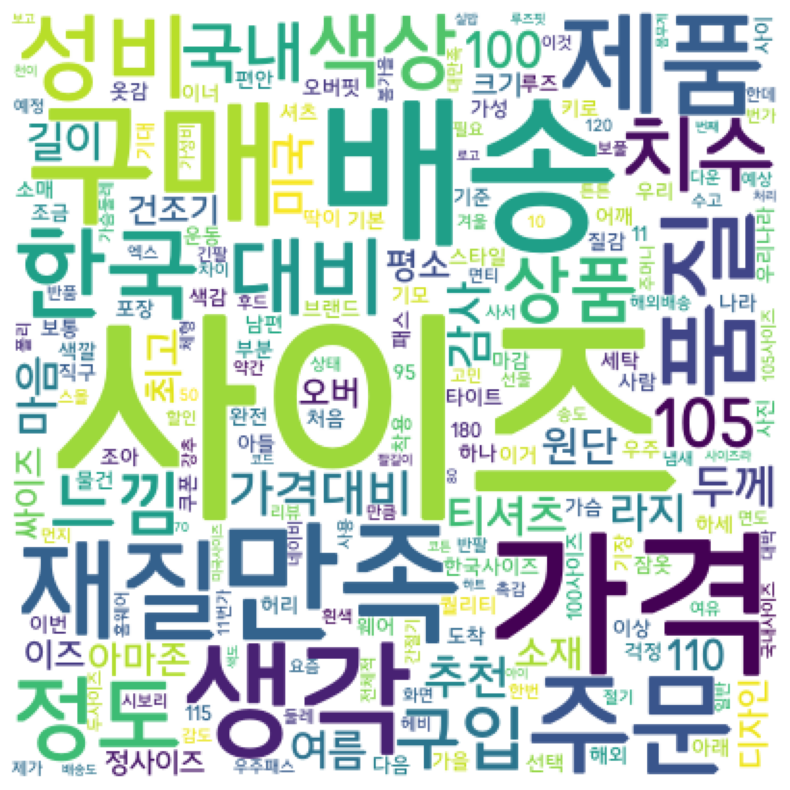

In [81]:
font_path = r"C:\Users\NT550009\Desktop\11st\11STREET_Gothic\11StreetGothic_OTF\11STREET_Gothic_regular.otf"


wc = WordCloud(random_state = 123, width = 400,font_path = font_path,
               height = 400, background_color = 'white', mask = imgArray    )

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('review_text_wordcloud') # 파일 저장

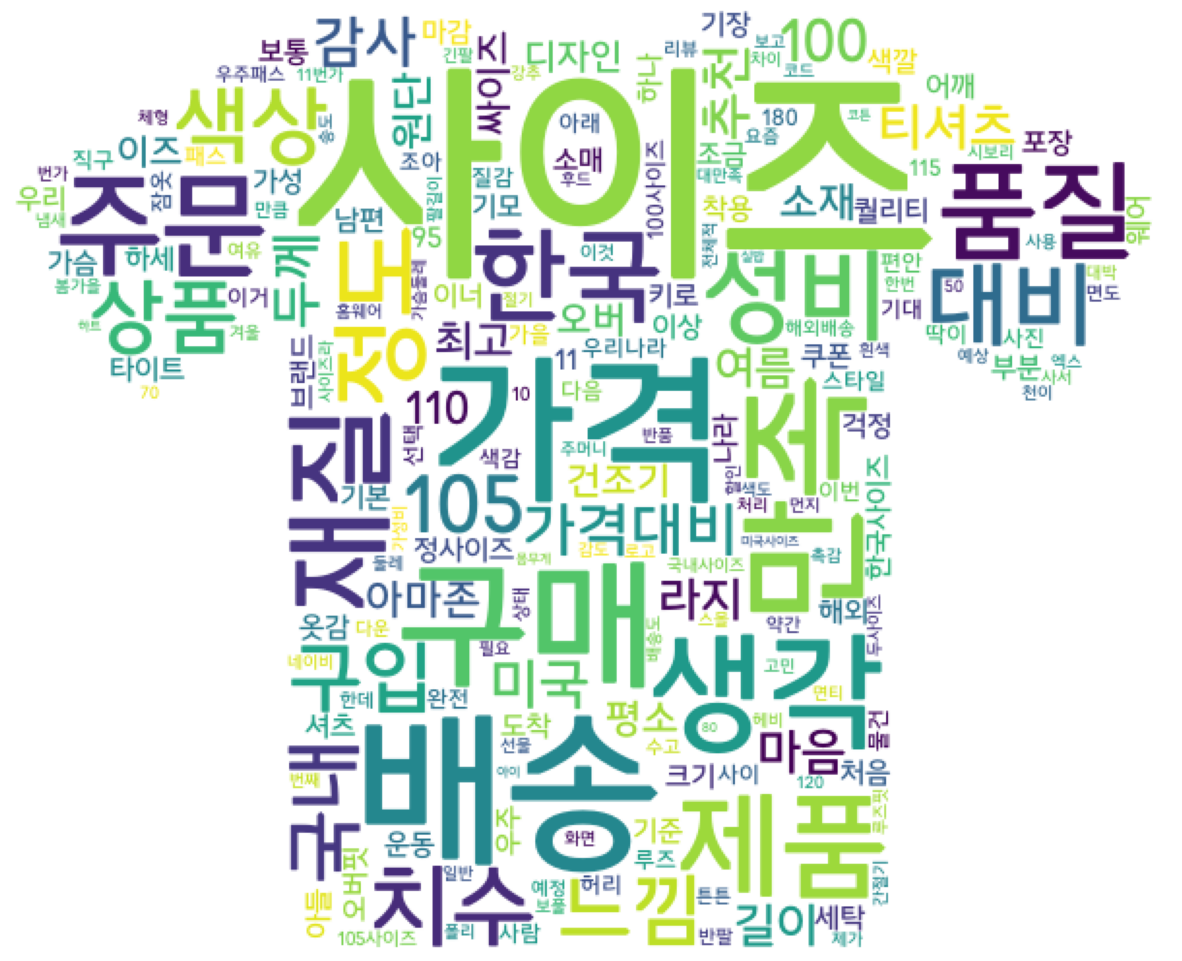

In [116]:
from PIL import Image
from wordcloud import ImageColorGenerator

img = Image.open(r"C:\Users\NT550009\Desktop\11st\t-shirt icon wordcloud.png") #이미지 오픈 
imgArray = np.array(img) # 이미지의 각 셀을 수치로 변환

font_path = r"C:\Users\NT550009\Desktop\11st\11STREET_Gothic\11StreetGothic_OTF\11STREET_Gothic_regular.otf"


wc = WordCloud(width = 400,height = 400, font_path = font_path,
               background_color = 'white', mask = imgArray).generate_from_frequencies(dic_word)

plt.figure(figsize = (15, 15)) # 크기 지정하기
plt.imshow(wc ,interpolation = 'bilinear')
plt.axis('off') # 축 없애기
plt.imshow(wc ) # 결과 보여주기
plt.savefig('review_text_wordcloud') # 파일 저장

In [ ]:
result_df.to_excel("sample_df.xlsx")

In [119]:
from PIL import Image
from wordcloud import ImageColorGenerator

from PIL import Image

# Open image and resize using BILINEAR resampling filter
# img = Image.open('image.jpg')
# img_resized = img.resize((400, 400), resample=Image.BILINEAR)


img = Image.open(r"C:\Users\NT550009\Desktop\11st\t-shirt icon wordcloud.png") #이미지 오픈 
imgArray = np.array(img) # 이미지의 각 셀을 수치로 변환

color_img = Image.open(r"C:\Users\NT550009\Desktop\11st\11st logo.png")
img_resized = img.resize((400, 400), resample=Image.BILINEAR)

font_path = r"C:\Users\NT550009\Desktop\11st\11STREET_Gothic\11StreetGothic_OTF\11STREET_Gothic_regular.otf"


wc = WordCloud(width = 400,height = 400, font_path = font_path,
               background_color = 'white', mask = imgArray).generate_from_frequencies(dic_word)



image_colors = ImageColorGenerator(img_resized)
wc = wc.recolor(color_func=image_colors)

plt.figure(figsize = (15, 15)) # 크기 지정하기
plt.imshow(wc ,interpolation = 'bilinear')
plt.axis('off') # 축 없애기
plt.imshow(wc ) # 결과 보여주기
plt.savefig('review_text_wordcloud') # 파일 저장

AttributeError: ndim

In [ ]:
# 평점이 낮은 제품에 사이즈 관련 언급이 있는지

# 

In [ ]:
# 1609 /7167 
# 0.2245011859913492 확률로 리뷰 관련 언급이 있음

In [ ]:
size_exist

In [ ]:
size_exist.to_excel("size.xlsx")


